# Calculando π por simulação

In [1]:
import random

def rnd(n):
    return [random.uniform(-1, 1) for _ in range(n)]

NUM_PONTOS = 5000
x = rnd(NUM_PONTOS)
y = rnd(NUM_PONTOS)

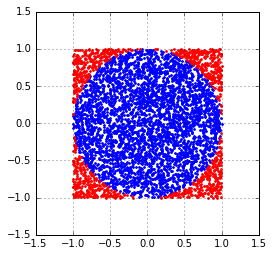

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def pares(seq1, seq2, predicado=lambda a, b: True):
    sim1, sim2, nao1, nao2 = [], [], [], []
    for a, b in zip(seq1, seq2):
        if predicado(a, b):
            sim1.append(a)
            sim2.append(b)
        else:
            nao1.append(a)
            nao2.append(b)
    return sim1, sim2, nao1, nao2

def no_circulo(a, b):
    return (a*a + b*b)**.5 <= 1

x_sim, y_sim, x_nao, y_nao = pares(x, y, no_circulo)

plt.figure()
plt.axes().set_aspect('equal')
plt.grid()
plt.scatter(x_sim, y_sim, 3, color='b')
plt.scatter(x_nao, y_nao, 3, color='r')

A ideia é 

$$
\frac{4}{total}=\frac{π}{dentro}
$$

$$
π = \frac{4 \cdot dentro}{total}
$$

In [3]:
len(x_sim) * 4 / NUM_PONTOS

3.0936

In [4]:
def pi(n):
    uni = random.uniform
    c = 0
    i = 0
    while i < n:
        if abs(complex(uni(-1, 1), uni(-1, 1))) <= 1:
            c += 1
        i += 1
    return c * 4.0 / n

In [6]:
res = [
 (1, 4.0),
 (10, 2.8),
 (100, 3.24),
 (1000, 3.096),
 (10000, 3.1248),
 (100000, 3.14144),
 (1000000, 3.142716),
 (10000000, 3.1410784),
 (100000000, 3.14149756),
 (1000000000, 3.141589804)
]

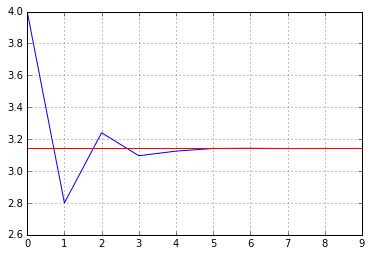

In [7]:
import math

plt.figure()
x, y = zip(*res)
x = [math.log(n, 10) for n in x]
plt.plot(x, y)
plt.axhline(math.pi, color='r')
plt.grid()